# Analyse des causes d'attrition chez TechNova Partners
## Étape 3 : Feature Engineering - Préparation des données pour la modélisation

**Objectif** : Préparer les données (X et y) pour l'entraînement de modèles de Machine Learning

## 1. Importation des bibliothèques

In [1]:
# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import shap


#bibliothèque Python

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (classification_report, confusion_matrix, recall_score, f1_score,accuracy_score,
                            accuracy_score, precision_score, f1_score,
                             classification_report, roc_auc_score, fbeta_score, make_scorer
                            )

from sklearn.model_selection import train_test_split


# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 2. Chargement du Dataset de l'analyse Exploratoire.

In [2]:
# 2. Chargement des données complètes
df = pd.read_csv('data_complete.csv')

print(f"📊 Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.info()

📊 Dataset chargé : 1470 lignes, 30 colonnes
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_employee                                1470 non-null   int64  
 1   age                                        1470 non-null   int64  
 2   genre                                      1470 non-null   str    
 3   revenu_mensuel                             1470 non-null   int64  
 4   statut_marital                             1470 non-null   str    
 5   departement                                1470 non-null   str    
 6   poste                                      1470 non-null   str    
 7   nombre_experiences_precedentes             1470 non-null   int64  
 8   annee_experience_totale                    1470 non-null   int64  
 9   annees_dans_l_entreprise                   1470 non-null   int6

#### 2.1 Affichage de variables quantitatives et qualitatives

In [3]:
variables_quantitatives =df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_qualitatives = df.select_dtypes(include=['object', 'string']).columns.tolist()

print("🔢 VARIABLES QUANTITATIVES (numériques) :\n")
for i, col in enumerate(variables_quantitatives, 1):
    print(f"{i:2d}. {col}")

print(f"\n📝 VARIABLES QUALITATIVES (catégorielles) :\n")
for i, col in enumerate(variables_qualitatives, 1):
    print(f"{i:2d}. {col}")

🔢 VARIABLES QUANTITATIVES (numériques) :

 1. id_employee
 2. age
 3. revenu_mensuel
 4. nombre_experiences_precedentes
 5. annee_experience_totale
 6. annees_dans_l_entreprise
 7. annees_dans_le_poste_actuel
 8. satisfaction_employee_environnement
 9. note_evaluation_precedente
10. niveau_hierarchique_poste
11. satisfaction_employee_nature_travail
12. satisfaction_employee_equipe
13. satisfaction_employee_equilibre_pro_perso
14. note_evaluation_actuelle
15. augmentation_salaire_precedente
16. nombre_participation_pee
17. nb_formations_suivies
18. distance_domicile_travail
19. niveau_education
20. annees_depuis_la_derniere_promotion
21. annes_sous_responsable_actuel
22. frequence_deplacement_encoded

📝 VARIABLES QUALITATIVES (catégorielles) :

 1. genre
 2. statut_marital
 3. departement
 4. poste
 5. heure_supplementaires
 6. a_quitte_l_entreprise
 7. domaine_etude
 8. frequence_deplacement


## 3 .Encoding des variables qualitative , methode : OneHotEncoder

### 3.1 Analyse des variables catégorielles

In [4]:
# Lister toutes les variables catégorielles (object)
variables_qualitatives = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"\n📝 Variables catégorielles détectées : {len(variables_qualitatives)}\n")

# Analyser chaque variable
for col in variables_qualitatives:
    print(f"\n{'='*70}")
    print(f"📌 Variable : {col}")
    print(f"{'='*70}")
    
    # Valeurs uniques
    valeurs_uniques = df[col].dropna().unique()
    nb_valeurs = len(valeurs_uniques)
    
    print(f"Nombre de valeurs uniques : {nb_valeurs}")
    print(f"Valeurs : {list(valeurs_uniques)}")
    
    # Distribution
    print(f"\nDistribution :")
    distribution = df[col].value_counts()
    for val, count in distribution.items():
        pourcentage = (count / len(df)) * 100
        print(f"  - {val:30s} : {count:4d} ({pourcentage:5.2f}%)")
    
    # Valeurs manquantes
    nb_missing = df[col].isnull().sum()
    if nb_missing > 0:
        print(f"\n⚠️  Valeurs manquantes : {nb_missing} ({(nb_missing/len(df)*100):.2f}%)")
    else :
        print("pas de valeurs manquantes sur l'ensemble de Dataset")


📝 Variables catégorielles détectées : 8


📌 Variable : genre
Nombre de valeurs uniques : 2
Valeurs : ['F', 'M']

Distribution :
  - M                              :  882 (60.00%)
  - F                              :  588 (40.00%)
pas de valeurs manquantes sur l'ensemble de Dataset

📌 Variable : statut_marital
Nombre de valeurs uniques : 3
Valeurs : ['Célibataire', 'Marié(e)', 'Divorcé(e)']

Distribution :
  - Marié(e)                       :  673 (45.78%)
  - Célibataire                    :  470 (31.97%)
  - Divorcé(e)                     :  327 (22.24%)
pas de valeurs manquantes sur l'ensemble de Dataset

📌 Variable : departement
Nombre de valeurs uniques : 3
Valeurs : ['Commercial', 'Consulting', 'Ressources Humaines']

Distribution :
  - Consulting                     :  961 (65.37%)
  - Commercial                     :  446 (30.34%)
  - Ressources Humaines            :   63 ( 4.29%)
pas de valeurs manquantes sur l'ensemble de Dataset

📌 Variable : poste
Nombre de valeurs uniques 

---

On a 8 variables catégorielles.  
On observe aucune valeur aberrante.

---

### 3.2 Encodage des variables catégorielles

#### a/ encodage de la variable 'ordre_deplacement' en OrdinaleEncoder

In [5]:


# Définir les ordres logiques pour chaque variable ordinale

# 1. Fréquence de déplacement
ordre_deplacement = ['Aucun', 'Occasionnel', 'Frequent']

print("\n📊 Variables ordinales à encoder :\n")
print("1. frequence_deplacement")
print(f"   Ordre : {' < '.join(ordre_deplacement)}")
print(f"   Encodage : {dict(zip(ordre_deplacement, range(len(ordre_deplacement))))}")

# Encoder fréquence de déplacement
encoder_deplacement = OrdinalEncoder(categories=[ordre_deplacement])
df['frequence_deplacement_encoded'] = encoder_deplacement.fit_transform(
    df[['frequence_deplacement']]
).astype(int)

# Vérifier que toutes les valeurs sont bien présentes
print("\n🔍 Vérification des valeurs :")
print(df['frequence_deplacement_encoded'].value_counts())

print("\n✅ Encodage ordinal terminé !")


📊 Variables ordinales à encoder :

1. frequence_deplacement
   Ordre : Aucun < Occasionnel < Frequent
   Encodage : {'Aucun': 0, 'Occasionnel': 1, 'Frequent': 2}

🔍 Vérification des valeurs :
frequence_deplacement_encoded
1    1043
2     277
0     150
Name: count, dtype: int64

✅ Encodage ordinal terminé !


#### b/ Encodage simple
Pour les variables qui ont 2 catégories :
- genre
- heures supplémentaire
- a_quitte_l_entreprise (variable cible)

In [6]:
# 1. heure_supplementaires : Oui → 1, Non → 0
df['heure_supplementaires_encoded'] = (df['heure_supplementaires'] == 'Oui').astype(int)
df['target'] = (df['a_quitte_l_entreprise'] == 'Oui').astype(int)
df['genre_encoded'] = (df['genre'] == 'M').astype(int)

print("\n✅ Variables binaires encodées :")
print(df[['heure_supplementaires', 'heure_supplementaires_encoded']].value_counts().sort_index())
print("="*80)
print(df[['a_quitte_l_entreprise', 'target']].value_counts().sort_index())
print("="*80)
print(df[['genre', 'genre_encoded']].value_counts().sort_index())


✅ Variables binaires encodées :
heure_supplementaires  heure_supplementaires_encoded
Non                    0                                1054
Oui                    1                                 416
Name: count, dtype: int64
a_quitte_l_entreprise  target
Non                    0         1233
Oui                    1          237
Name: count, dtype: int64
genre  genre_encoded
F      0                588
M      1                882
Name: count, dtype: int64


#### c/ Encodage des autres variables OneHotEncoder

In [7]:
variables_nominales = [
    'statut_marital',
    'departement',
    'poste',
    'domaine_etude'
]

print(f"\n📝 Variables nominales à encoder : {len(variables_nominales)}\n")
for var in variables_nominales:
    nb_categories = df[var].nunique()
    print(f"  - {var:25s} : {nb_categories} catégories")

encoder_nominal = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder_nominal.fit_transform(df[variables_nominales])
feature_names = encoder_nominal.get_feature_names_out(variables_nominales)

df_encoded = pd.DataFrame(
    encoded_array, 
    columns=feature_names,
    index=df.index
)

print(f"\n✅ OneHotEncoding terminé !")
print(f"   Nombre de nouvelles colonnes créées : {df_encoded.shape[1]}")
print(f"\n📋 Aperçu des colonnes créées :")
for i, col in enumerate(df_encoded.columns, 1):
    print(f"  {i:2d}. {col}")


📝 Variables nominales à encoder : 4

  - statut_marital            : 3 catégories
  - departement               : 3 catégories
  - poste                     : 9 catégories
  - domaine_etude             : 6 catégories

✅ OneHotEncoding terminé !
   Nombre de nouvelles colonnes créées : 17

📋 Aperçu des colonnes créées :
   1. statut_marital_Divorcé(e)
   2. statut_marital_Marié(e)
   3. departement_Consulting
   4. departement_Ressources Humaines
   5. poste_Cadre Commercial
   6. poste_Consultant
   7. poste_Directeur Technique
   8. poste_Manager
   9. poste_Représentant Commercial
  10. poste_Ressources Humaines
  11. poste_Senior Manager
  12. poste_Tech Lead
  13. domaine_etude_Entrepreunariat
  14. domaine_etude_Infra & Cloud
  15. domaine_etude_Marketing
  16. domaine_etude_Ressources Humaines
  17. domaine_etude_Transformation Digitale


## 5. Création de la variable cible

In [8]:
y = (df['target'])
reste = (y == 0).sum()
parti = (y == 1).sum()
pct_parti= parti/len(y)*100
pct_reste = reste/len(y)*100

print("\n✅ Variable cible 'y' créée avec succès")
print(f"\nType : {type(y)}")
print(f"Shape : {y.shape}")
print(f"\n📊 Distribution de y :")
print(f"  - Restés (0) : {pct_reste:.2f}%")
print(f"  - Partis (1) : {pct_parti:.2f}%")


✅ Variable cible 'y' créée avec succès

Type : <class 'pandas.Series'>
Shape : (1470,)

📊 Distribution de y :
  - Restés (0) : 83.88%
  - Partis (1) : 16.12%


---

On voit qu'il y a une disparité entre les valeurs de la Target avec une prépondérance pour "restés"

---

## 6. Exclusion des features non utilisés
On va supprimer la feature Id, la target, et les features qualitative orginale qui ont été encodée.

In [9]:
print("="*80)
print("ÉTAPE 3 : CRÉATION DU DATAFRAME X")
print("="*80)

# 1. Lister les colonnes à EXCLURE de X
colonnes_a_exclure = [
    'id_employee',                   # Identifiant (pas prédictif)
    
    # Variable cible
    'a_quitte_l_entreprise', 
    'target',                       
    
    # Variables catégorielles ORIGINALES (avant encodage)
    'genre',
    'statut_marital',
    'departement',
    'poste',
    'domaine_etude',
    'heure_supplementaires',
    'frequence_deplacement',

    #la target
    'target',
]


print(f"\n❌ Colonnes à EXCLURE de X ({len(colonnes_a_exclure)}) :")
for col in colonnes_a_exclure:
    print(f"   - {col}")

# Variables numériques à garder
variables_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numeriques_a_garder = [col for col in variables_numeriques 
                                  if col not in colonnes_a_exclure]

print(f"\n✅ Variables NUMÉRIQUES à garder ({len(variables_numeriques_a_garder)}) :")
for i, col in enumerate(variables_numeriques_a_garder, 1):
    print(f"  {i:2d}. {col}")

# Créer X_numeriques
X_numeriques = df[variables_numeriques_a_garder]

print(f"\n📊 X_numeriques : {X_numeriques.shape}")

ÉTAPE 3 : CRÉATION DU DATAFRAME X

❌ Colonnes à EXCLURE de X (11) :
   - id_employee
   - a_quitte_l_entreprise
   - target
   - genre
   - statut_marital
   - departement
   - poste
   - domaine_etude
   - heure_supplementaires
   - frequence_deplacement
   - target

✅ Variables NUMÉRIQUES à garder (23) :
   1. age
   2. revenu_mensuel
   3. nombre_experiences_precedentes
   4. annee_experience_totale
   5. annees_dans_l_entreprise
   6. annees_dans_le_poste_actuel
   7. satisfaction_employee_environnement
   8. note_evaluation_precedente
   9. niveau_hierarchique_poste
  10. satisfaction_employee_nature_travail
  11. satisfaction_employee_equipe
  12. satisfaction_employee_equilibre_pro_perso
  13. note_evaluation_actuelle
  14. augmentation_salaire_precedente
  15. nombre_participation_pee
  16. nb_formations_suivies
  17. distance_domicile_travail
  18. niveau_education
  19. annees_depuis_la_derniere_promotion
  20. annes_sous_responsable_actuel
  21. frequence_deplacement_encoded

## 7. Fusion des features pour nouveau Dataset

In [10]:
# Concaténer toutes les features
X = pd.concat([
    X_numeriques,        
    df_encoded,             
], axis=1)

print(f"\n✅ DataFrame X créé avec succès !")
print(f"\n📊 Dimensions de X : {X.shape}")
print(f"   - {X.shape[0]} lignes (employés)")
print(f"   - {X.shape[1]} colonnes (features)")

display(X.columns.tolist()) 


✅ DataFrame X créé avec succès !

📊 Dimensions de X : (1470, 40)
   - 1470 lignes (employés)
   - 40 colonnes (features)


['age',
 'revenu_mensuel',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'augmentation_salaire_precedente',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'frequence_deplacement_encoded',
 'heure_supplementaires_encoded',
 'genre_encoded',
 'statut_marital_Divorcé(e)',
 'statut_marital_Marié(e)',
 'departement_Consulting',
 'departement_Ressources Humaines',
 'poste_Cadre Commercial',
 'poste_Consultant',
 'poste_Directeur Technique',
 'poste_Manager',
 'poste_Représentant Commercial',
 'poste_Ressources Humaines',
 'poste_Senior M

---

On a bien exclus les features catégorielles originales qui ont été encodées et la target

---

## 8. Matrice de Corrélation de Spearman

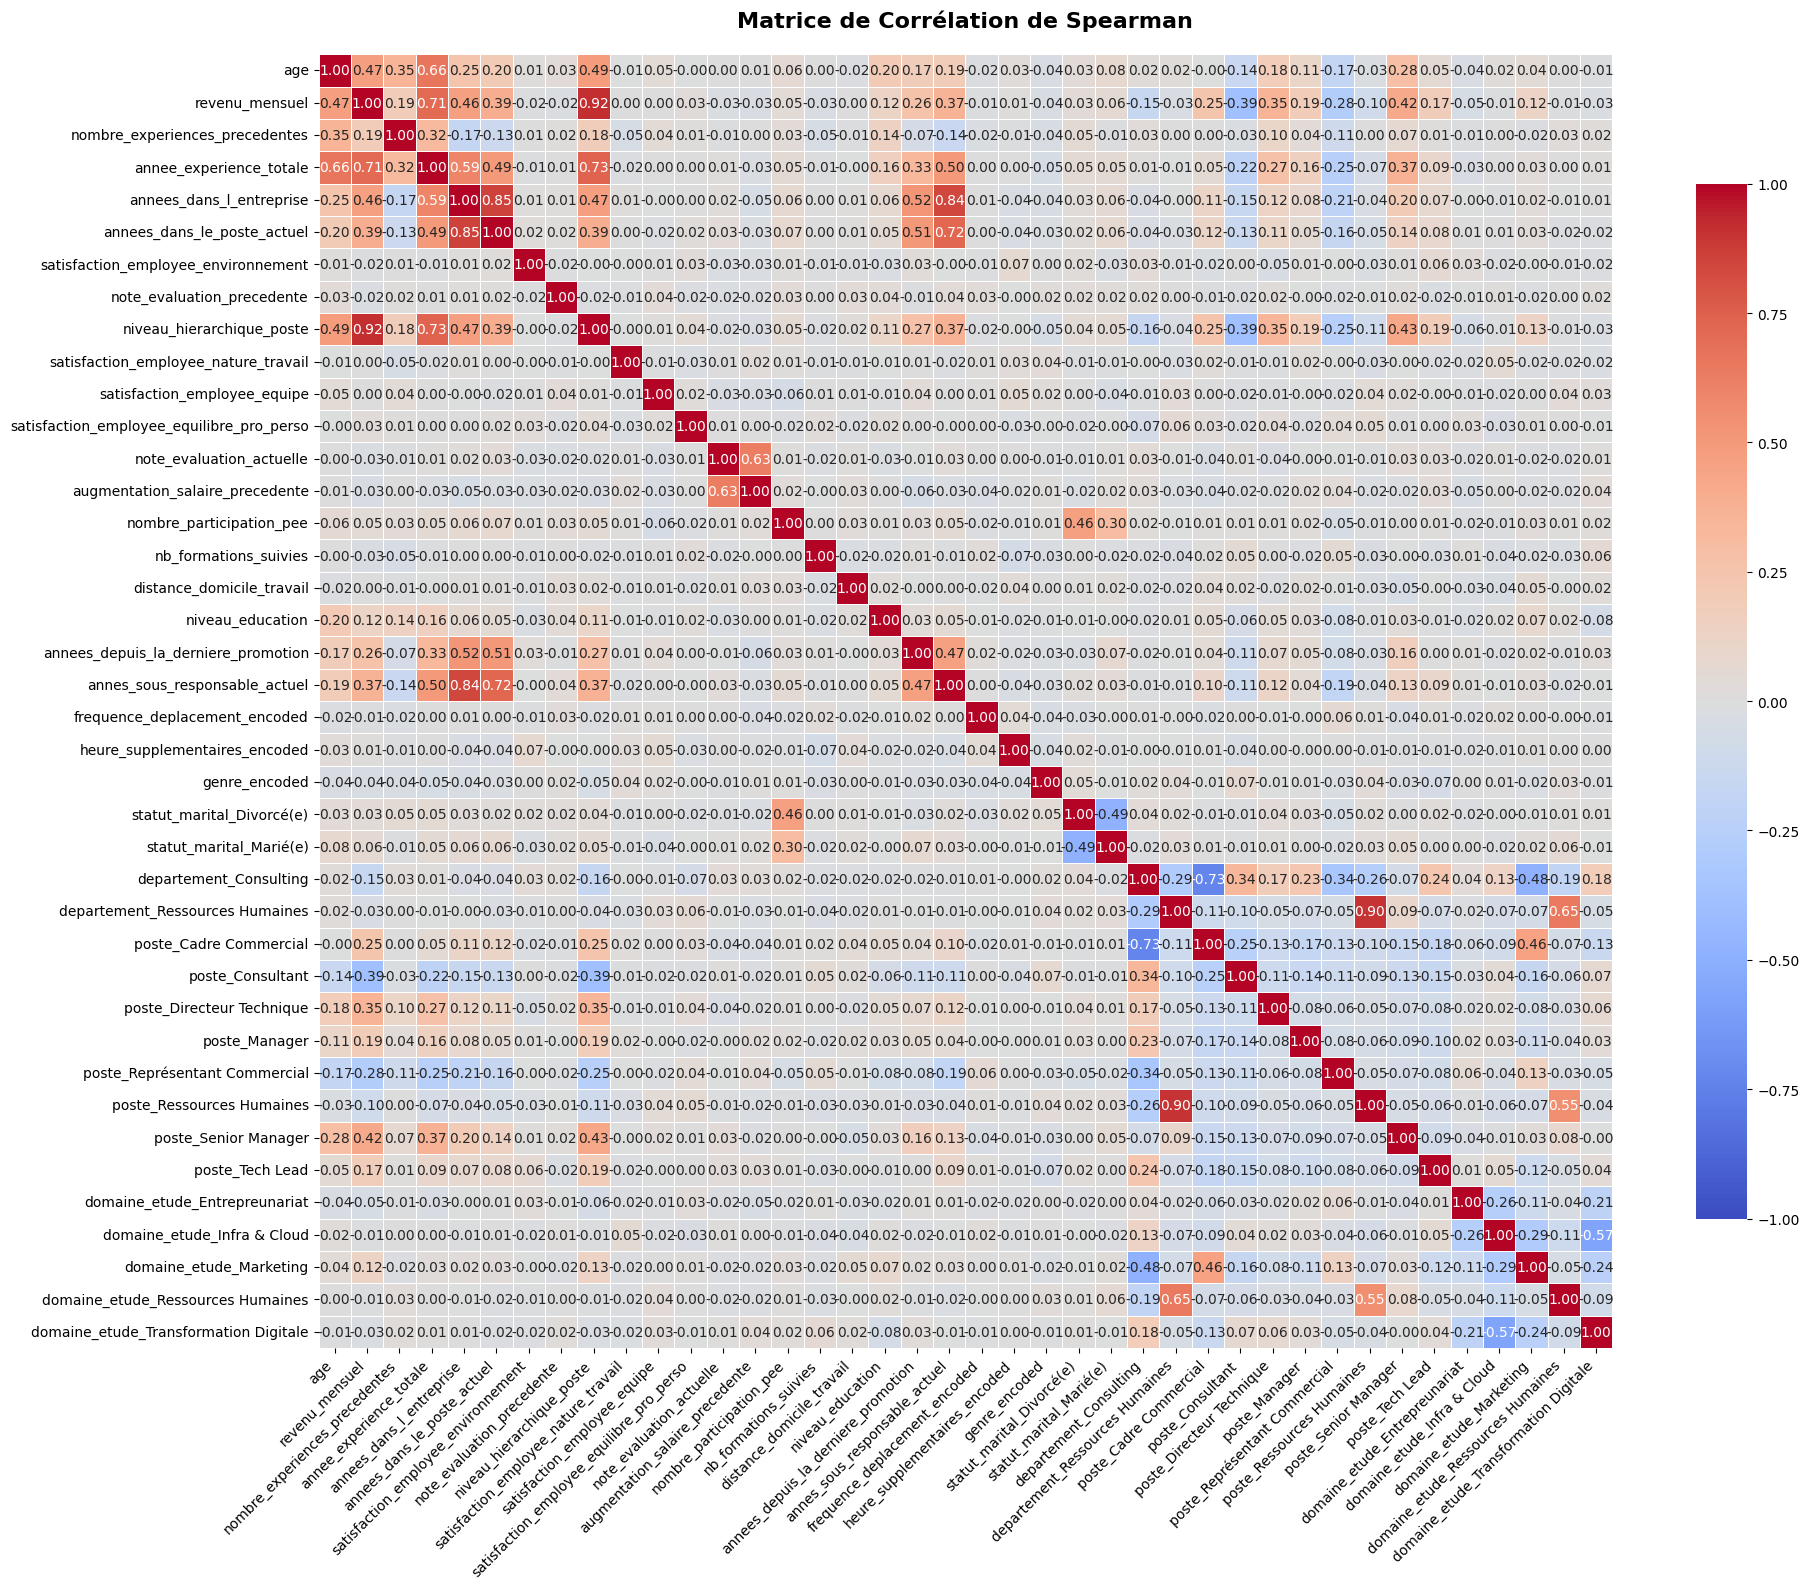

In [11]:
correlation_spearman = X.corr(method='spearman')
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_spearman, 
    annot=True,           
    fmt='.2f',            
    cmap='coolwarm',     
    center=0,             
    vmin=-1, vmax=1,     
    square=True,        
    linewidths=0.5,      
    cbar_kws={"shrink": 0.8}  
)
plt.title('Matrice de Corrélation de Spearman', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### A/ Identification des corrélations fortes

In [12]:
seuil = 0.7

# Trouver les paires de features fortement corrélées
correlations_fortes = []

for i in range(len(correlation_spearman.columns)):
    for j in range(i+1, len(correlation_spearman.columns)):
        corr_value = correlation_spearman.iloc[i, j]
        
        if abs(corr_value) >= seuil:
            correlations_fortes.append({
                'Feature_1': correlation_spearman.columns[i],
                'Feature_2': correlation_spearman.columns[j],
                'Correlation': corr_value
            })

# Créer un DataFrame pour affichage
df_corr_fortes = pd.DataFrame(correlations_fortes)

if len(df_corr_fortes) > 0:
    # Trier par valeur absolue de corrélation (décroissant)
    df_corr_fortes['Abs_Correlation'] = df_corr_fortes['Correlation'].abs()
    df_corr_fortes = df_corr_fortes.sort_values('Abs_Correlation', ascending=False)
    
    print(f"\n⚠️  {len(df_corr_fortes)} paires de features avec corrélation ≥ {seuil} :\n")
    print("="*80)
    
    
    # Afficher le DataFrame
    display(df_corr_fortes[['Feature_1', 'Feature_2', 'Correlation']].reset_index(drop=True))
    
else:
    print(f"\n✅ Aucune paire de features avec corrélation ≥ {seuil}")
    print("   → Pas de multicolinéarité importante détectée !")


⚠️  8 paires de features avec corrélation ≥ 0.7 :



,Feature_1,Feature_2,Correlation
0,revenu_mensuel,niveau_hierarchique_poste,0.920429
1,departement_Ressources Humaines,poste_Ressources Humaines,0.904983
2,annees_dans_l_entreprise,annees_dans_le_poste_actuel,0.854000
3,annees_dans_l_entreprise,annes_sous_responsable_actuel,0.842803
4,annee_experience_totale,niveau_hierarchique_poste,0.734678
5,departement_Consulting,poste_Cadre Commercial,-0.733497
6,annees_dans_le_poste_actuel,annes_sous_responsable_actuel,0.724754
7,revenu_mensuel,annee_experience_totale,0.710024


---

Je choisi de tester le modèle en enlevant les features trop corrélés entre elle.

'niveau_hierarchique_poste',
    'departement_Ressources Humaines', 
    'annes_sous_responsable_actuel'

---


In [13]:
features_to_drop = [
    'niveau_hierarchique_poste',
    'departement_Ressources Humaines', 
    'annes_sous_responsable_actuel'
]

X_cleaned = X.drop(columns=features_to_drop)

## 9. Modélisation
Le déséquilibre important entre les employé aprtis et restés. Si ce déséquilibre n'est pas correctement traité, cela pourrait nuir à la modélisation prédictive.  

Pour garantir la fiabilité de ma modélisation, j'applique une séparation stratifiée des données

### 9.1. Séparation Train/Test et Stratification

In [14]:
print("="*80)
print("ÉTAPE 3.1 : SÉPARATION TRAIN/TEST")
print("="*80)

# Séparation train/test
print(f"\n⏳ Séparation des données en cours...")
print(f"  • 80% pour l'entraînement (TRAIN)")
print(f"  • 20% pour le test (TEST)")

X_train, X_test, y_train, y_test = train_test_split(
    X,                   
    y,                    
    test_size=0.2,        
    random_state=42,       
    stratify=y              
)

#entrainement X_cleaned
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(
    X_cleaned,                   
    y,                    
    test_size=0.2,        
    random_state=42,       
    stratify=y              
)

print("\n✅ Séparation effectuée avec succès !")

# Afficher les dimensions
print(f"\n📊 Dimensions des jeux de données standard :")
print(f"{'─'*80}")
print(f"  JEU D'ENTRAÎNEMENT (TRAIN) :")
print(f"    • X_train : {X_train.shape} ")
print(f"    • y_train : {y_train.shape}")
print(f"\n  JEU DE TEST (TEST) :")
print(f"    • X_test  : {X_test.shape}")
print(f"    • y_test  : {y_test.shape}")

print(f"\n✅ Vérification de la STRATIFICATION :")
print(f"{'─'*80}")

print(f"\n  TRAIN :")
print(f"    • Restés (0) : {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")
print(f"    • Partis (1) : {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")

print(f"\n  TEST :")
print(f"    • Restés (0) : {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")
print(f"    • Partis (1) : {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.2f}%)")

print(f"\n  ORIGINAL :")
print(f"    • Restés (0) : {(y==0).sum()} ({(y==0).sum()/len(y)*100:.2f}%)")
print(f"    • Partis (1) : {(y==1).sum()} ({(y==1).sum()/len(y)*100:.2f}%)")

ÉTAPE 3.1 : SÉPARATION TRAIN/TEST

⏳ Séparation des données en cours...
  • 80% pour l'entraînement (TRAIN)
  • 20% pour le test (TEST)

✅ Séparation effectuée avec succès !

📊 Dimensions des jeux de données standard :
────────────────────────────────────────────────────────────────────────────────
  JEU D'ENTRAÎNEMENT (TRAIN) :
    • X_train : (1176, 40) 
    • y_train : (1176,)

  JEU DE TEST (TEST) :
    • X_test  : (294, 40)
    • y_test  : (294,)

✅ Vérification de la STRATIFICATION :
────────────────────────────────────────────────────────────────────────────────

  TRAIN :
    • Restés (0) : 986 (83.84%)
    • Partis (1) : 190 (16.16%)

  TEST :
    • Restés (0) : 247 (84.01%)
    • Partis (1) : 47 (15.99%)

  ORIGINAL :
    • Restés (0) : 1233 (83.88%)
    • Partis (1) : 237 (16.12%)


### 9.2. Hyperparamètres avec GridSearchCV + fonction coût personnalisée - SVM et Logistic Regression

In [15]:
def custom_cost_scorer(y_true, y_pred):
    """
    Scorer personnalisé où les FN coûtent 10 fois plus cher
    
    Matrice de confusion :
             Pred 0   Pred 1
    True 0  |  TN  |  FP  |
    True 1  |  FN  |  TP  |
    
    Coût = FP + 10*FN (à minimiser)
    On retourne -Coût pour que GridSearch le maximise
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Coût total : FN pèse 10 fois plus lourd
    cost = fp + 10 * fn
    
    # Retourner l'opposé pour maximiser (GridSearch maximise le score)
    return -cost

# Créer le scorer
weighted_scorer = make_scorer(custom_cost_scorer)


# 2️⃣ CONFIGURATION DES MODÈLES ET GRILLES D'HYPERPARAMÈTRES
# ============================================================================
models_config = {
    'SVM': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC(random_state=42, class_weight='balanced'))
        ]),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],                    
            'classifier__kernel': ['linear', 'rbf'],          
            'classifier__gamma': ['scale', 'auto']           
        }
    },
    
    'Logistic Regression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
        ]),
        'param_grid': {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear', 'saga']
        }
    }
}


# 3️⃣ BOUCLE SUR LES MODÈLES
# ============================================================================
results_dict = {}  # Pour stocker les meilleurs modèles

for model_name, config in models_config.items():
    
    print("\n" + "="*80)
    print(f"🚀 OPTIMISATION : {model_name}")
    print("="*80)
    
    # Récupérer le pipeline et param_grid
    pipeline = config['pipeline']
    param_grid = config['param_grid']
    
    # Calculer le nombre de combinaisons
    n_combinations = 1
    for values in param_grid.values():
        n_combinations *= len(values)
    
    print(f"🔍 Recherche des meilleurs hyperparamètres pour {model_name}...")
    print(f"   → {n_combinations} combinaisons à tester")
    print(f"   → Validation croisée : 5 folds")
    print(f"   → Scoring : Fonction coût personnalisée (FN × 10)\n")
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,                         
        scoring=weighted_scorer,              
        n_jobs=-1,                     
        verbose=1                     
    )
    
    # Entraînement
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    results_dict[model_name] = best_model
    
    # 4️⃣ AFFICHAGE DES RÉSULTATS
    # ============================================================================
    print("\n" + "─"*80)
    print("🏆 MEILLEURS HYPERPARAMÈTRES TROUVÉS")
    print("─"*80)
    for param, value in grid_search.best_params_.items():
        param_name = param.replace('classifier__', '')
        print(f"   • {param_name}: {value}")
    
    print(f"\n📊 MEILLEUR SCORE (Coût en cross-validation)")
    print(f"   → {grid_search.best_score_:.4f}")
    
    # Prédictions sur le test set
    y_pred_test = best_model.predict(X_test)
    
    # Matrice de confusion
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    
    print("\n" + "─"*80)
    print("🔍 MATRICE DE CONFUSION (Test Set)")
    print("─"*80)
    print(f"   TN (Vrai Négatif)  : {tn:>4}")
    print(f"   FP (Faux Positif)  : {fp:>4}")
    print(f"   FN (Faux Négatif)  : {fn:>4} ← PÉNALISÉ ×10")
    print(f"   TP (Vrai Positif)  : {tp:>4}")
    
    # Calcul du coût
    cost_test = fp + 10 * fn
    print(f"\n💰 COÛT TOTAL : {cost_test:.2f} (FP + 10×FN)")
    print(f"   → FP contribue : {fp}")
    print(f"   → FN contribue : {10*fn} ({fn} × 10)")
    
    # Métriques classiques
    print("\n" + "─"*80)
    print("📈 PERFORMANCES SUR LE TEST SET")
    print("─"*80)
    print(f"Accuracy  : {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred_test):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred_test):.4f}")
    print(f"F1-Score  : {f1_score(y_test, y_pred_test):.4f}")


print("\n\n" + "="*80)
print("📊 COMPARAISON FINALE DES MODÈLES")
print("="*80)

comparison_results = []

for model_name, model in results_dict.items():
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = fp + 10 * fn
    
    comparison_results.append({
        'Modèle': model_name,
        'Coût Total': cost,
        'FN': fn,
        'FP': fp,
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

df_comparison = pd.DataFrame(comparison_results)
df_comparison = df_comparison.sort_values('Coût Total')

print("\n", df_comparison.to_string(index=False))

print("\n" + "─"*80)
best_model_name = df_comparison.iloc[0]['Modèle']
best_cost = df_comparison.iloc[0]['Coût Total']
print(f"🏆 MEILLEUR MODÈLE : {best_model_name}")
print(f"💰 Coût le plus bas : {best_cost:.0f}")
print("─"*80)

print("\n✅ Optimisation terminée pour les 2 modèles !")


🚀 OPTIMISATION : SVM
🔍 Recherche des meilleurs hyperparamètres pour SVM...
   → 12 combinaisons à tester
   → Validation croisée : 5 folds
   → Scoring : Fonction coût personnalisée (FN × 10)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

────────────────────────────────────────────────────────────────────────────────
🏆 MEILLEURS HYPERPARAMÈTRES TROUVÉS
────────────────────────────────────────────────────────────────────────────────
   • C: 1
   • gamma: scale
   • kernel: linear

📊 MEILLEUR SCORE (Coût en cross-validation)
   → -149.6000

────────────────────────────────────────────────────────────────────────────────
🔍 MATRICE DE CONFUSION (Test Set)
────────────────────────────────────────────────────────────────────────────────
   TN (Vrai Négatif)  :  198
   FP (Faux Positif)  :   49
   FN (Faux Négatif)  :   18 ← PÉNALISÉ ×10
   TP (Vrai Positif)  :   29

💰 COÛT TOTAL : 229.00 (FP + 10×FN)
   → FP contribue : 49
   → FN contribue : 180 (18 × 10)

────────────────

### 9.2 Configuration des modèles

In [16]:
def get_models_config(use_class_weight=False):

    class_weight = 'balanced' if use_class_weight else None
    
    modeles = {
        'Dummy (Baseline)': DummyClassifier(
            strategy='most_frequent',
            random_state=42
        ),
        
        'Logistic Regression': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(
                max_iter=1000,
                random_state=42,
                class_weight=class_weight
            ))
        ]),
        
        'Decision Tree': DecisionTreeClassifier(
            max_depth=10,
            random_state=42,
            class_weight=class_weight
        ),
        
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            class_weight=class_weight
        ),
        
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            random_state=42
        ),
        

    }
    
    return modeles

# Test de la fonction
print("📋 Configuration des modèles disponibles :\n")
modeles_test = get_models_config()
for i, nom in enumerate(modeles_test.keys(), 1):
    print(f"  {i}. {nom}")
print(f"\n✅ Total : {len(modeles_test)} modèles configurés")

📋 Configuration des modèles disponibles :

  1. Dummy (Baseline)
  2. Logistic Regression
  3. Decision Tree
  4. Random Forest
  5. Gradient Boosting

✅ Total : 5 modèles configurés


#### a/Fonction d'entrainement et évaluation

In [17]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, modeles_dict, verbose=True):
    resultats = []
    predictions = {}
    matrices_confusion = {}
    modeles_entraines = {}
    
    for nom_modele, modele in modeles_dict.items():
        if verbose:
            print(f"\n{'─'*80}")
            print(f"🔄 Entraînement : {nom_modele}")
            print(f"{'─'*80}")
        
        modele.fit(X_train, y_train)
        
        y_pred_train = modele.predict(X_train)
        y_pred_test = modele.predict(X_test)
        
        # Probabilités (pour ROC-AUC)
        try:
            y_proba_test = modele.predict_proba(X_test)[:, 1]
        except:
            y_proba_test = y_pred_test
        
        # Métriques TRAIN
        acc_train = accuracy_score(y_train, y_pred_train)
        
        # Métriques TEST
        acc_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test, zero_division=0)
        recall_test = recall_score(y_test, y_pred_test, zero_division=0)
        f1_test = f1_score(y_test, y_pred_test, zero_division=0)
        
        try:
            roc_auc_test = roc_auc_score(y_test, y_proba_test)
        except:
            roc_auc_test = 0.5
        
        # Matrice de confusion
       # Matrice de confusion (pour affichage détaillé)
        cm = confusion_matrix(y_test, y_pred_test)
        tn, fp, fn, tp = cm.ravel()
        
        # ✅ RÉUTILISATION de custom_cost_scorer
        # Attention : la fonction retourne -coût, donc on prend l'opposé
        cout_metier = -custom_cost_scorer(y_test, y_pred_test)
        
        matrices_confusion[nom_modele] = cm
        predictions[nom_modele] = y_pred_test
        modeles_entraines[nom_modele] = modele
        
        # Calculer overfitting
        overfitting = acc_train - acc_test
        
        # Stocker les résultats
        resultats.append({
            'Modèle': nom_modele,
            'Accuracy_train': acc_train,
            'Accuracy_test': acc_test,
            'Precision': precision_test,
            'Recall': recall_test,
            'F1-Score': f1_test,
            'ROC-AUC': roc_auc_test,
            'Overfitting': overfitting,
            'Coût_métier': cout_metier,
            'FN': fn,
            'FP': fp
        })
        
        if verbose:
            print(f"  ✅ Terminé")
            print(f"     • Accuracy (test) : {acc_test:.4f}")
            print(f"     • Recall (test)   : {recall_test:.4f} ⭐ (métrique clé)")
            print(f"     • F1-Score (test) : {f1_test:.4f}")
            print(f"     • 💰 Coût métier  : {cout_metier:.0f} (FP={fp} + FN×10={fn}×10={fn*10})")
    
    # Créer DataFrame des résultats
    df_resultats = pd.DataFrame(resultats)
    
    # Trier par Coût métier (du plus bas au plus élevé)
    df_resultats = df_resultats.sort_values('Coût_métier', ascending=True)
    
    if verbose:
        print("\n" + "="*80)
        print("📊 RÉSULTATS COMPARATIFS (triés par Coût métier)")
        print("="*80)
        print(df_resultats.to_string(index=False))
        
        # Afficher le meilleur modèle selon le coût
        print("\n" + "─"*80)
        best_model_name = df_resultats.iloc[0]['Modèle']
        best_cost = df_resultats.iloc[0]['Coût_métier']
        best_recall = df_resultats.iloc[0]['Recall']
        print(f"🏆 MEILLEUR MODÈLE (selon coût métier) : {best_model_name}")
        print(f"   💰 Coût : {best_cost:.0f}")
        print(f"   📈 Recall : {best_recall:.4f}")
        print("─"*80)
    
    return df_resultats, predictions, matrices_confusion, modeles_entraines

#### b/ Fonction de visualisation des résultats

In [18]:
def plot_results(df_resultats, matrices_confusion, titre="Comparaison des Modèles"):
    print("\n" + "="*80)
    print(f"📊 {titre.upper()}")
    print("="*80)
    
    df_sorted = df_resultats.sort_values('Recall', ascending=False)
    print("\n🏆 CLASSEMENT PAR RECALL (métrique clé) :\n")
    print(df_sorted.to_string(index=False))
    
    meilleur = df_sorted.iloc[0]
    print(f"\n🥇 MEILLEUR MODÈLE : {meilleur['Modèle']}")
    print(f"   • Recall : {meilleur['Recall']:.2%}")
    print(f"   • F1-Score : {meilleur['F1-Score']:.2%}")
    print(f"   • ROC-AUC : {meilleur['ROC-AUC']:.2%}")
    
    # 3. Matrices de confusion
    n_modeles = len(matrices_confusion)
    n_cols = 3
    n_rows = (n_modeles + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_modeles > 1 else [axes]
    
    for idx, (nom_modele, cm) in enumerate(matrices_confusion.items()):
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            ax=axes[idx], cbar=False,
            xticklabels=['Resté', 'Parti'],
            yticklabels=['Resté', 'Parti']
        )
        
        # Calculer le recall depuis la matrice
        recall = cm[1,1] / (cm[1,0] + cm[1,1]) if (cm[1,0] + cm[1,1]) > 0 else 0
        
        axes[idx].set_title(
            f'{nom_modele}\nRecall: {recall:.2%}',
            fontsize=12, fontweight='bold'
        )
        axes[idx].set_xlabel('Prédit', fontsize=10)
        axes[idx].set_ylabel('Réel', fontsize=10)
    
    # Masquer les subplots vides
    for idx in range(len(matrices_confusion), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Matrices de Confusion - {titre}',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

print("✅ Fonction plot_results() créée")

✅ Fonction plot_results() créée


## 10 Visualisation des résultats en fonction du travail sur le Dataset

### 10.1 Expérimentation 1 : dataset Standard


────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Dummy (Baseline)
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8401
     • Recall (test)   : 0.0000 ⭐ (métrique clé)
     • F1-Score (test) : 0.0000
     • 💰 Coût métier  : 470 (FP=0 + FN×10=47×10=470)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Logistic Regression
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8605
     • Recall (test)   : 0.3617 ⭐ (métrique clé)
     • F1-Score (test) : 0.4533
     • 💰 Coût métier  : 311 (FP=11 + FN×10=30×10=300)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Decision Tree
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.7857
     • R

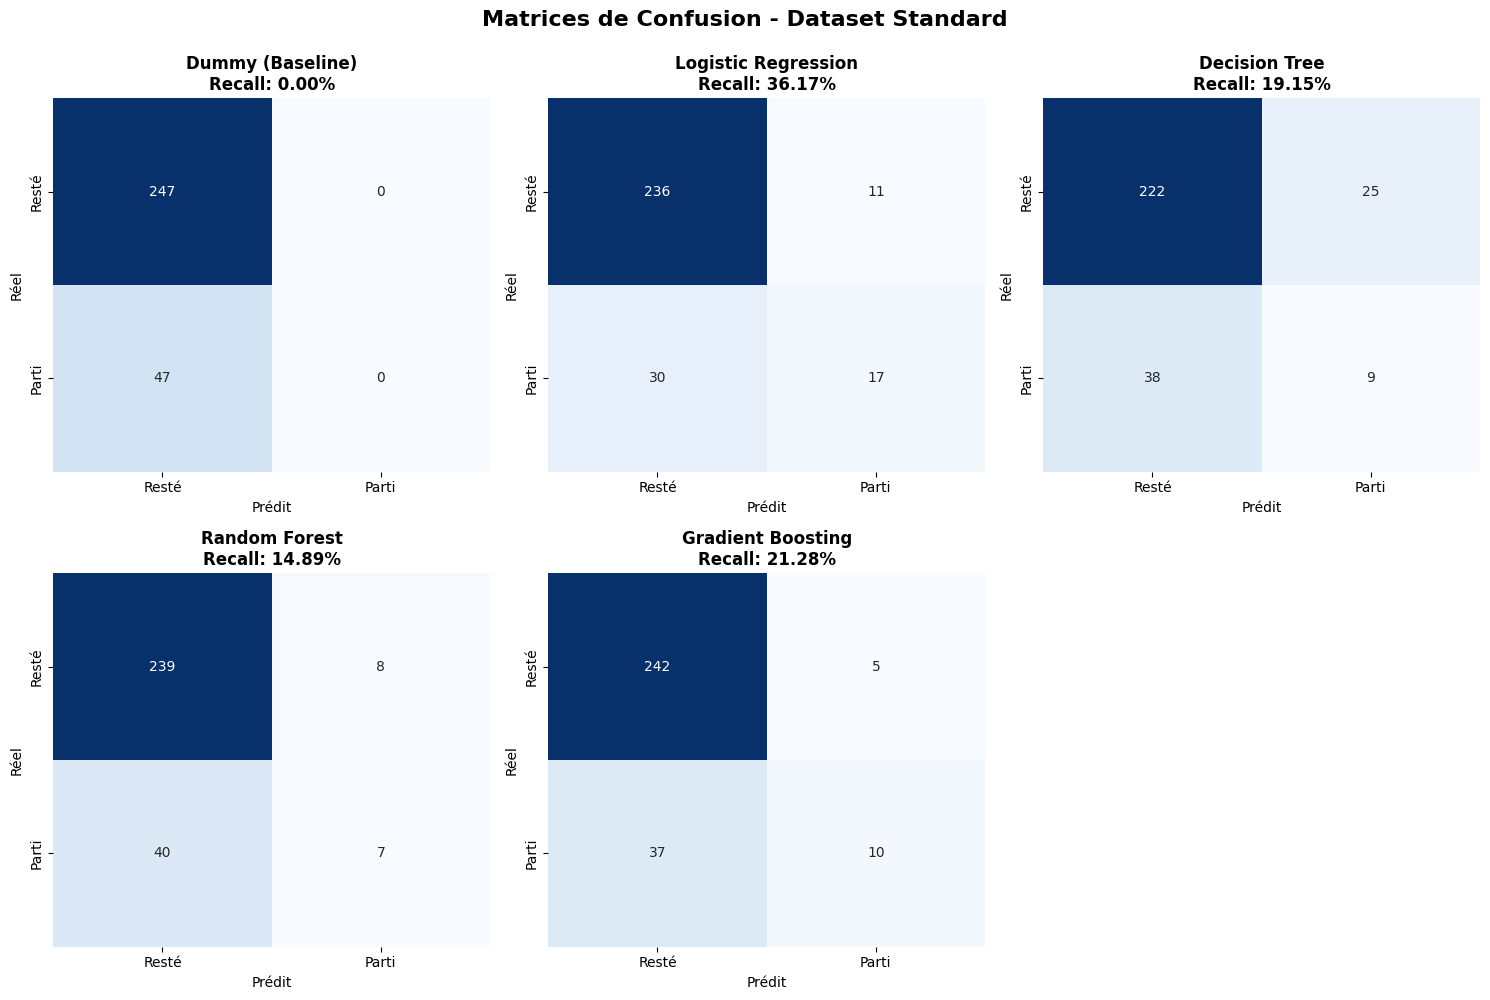

In [19]:
modeles = get_models_config(use_class_weight=False)

# Entraînement et évaluation
results_std, preds_std, cms_std, models_std = train_and_evaluate_models(
    X_train, X_test, y_train, y_test,
    modeles,
    verbose=True
)

# Visualisation
plot_results(results_std, cms_std, titre="Dataset Standard")

### 10.2 Expérimentation 2 : Dataset nettoyé (sans features corrélées)


────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Dummy (Baseline)
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8401
     • Recall (test)   : 0.0000 ⭐ (métrique clé)
     • F1-Score (test) : 0.0000
     • 💰 Coût métier  : 470 (FP=0 + FN×10=47×10=470)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Logistic Regression
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8639
     • Recall (test)   : 0.3617 ⭐ (métrique clé)
     • F1-Score (test) : 0.4595
     • 💰 Coût métier  : 310 (FP=10 + FN×10=30×10=300)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Decision Tree
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.7993
     • R

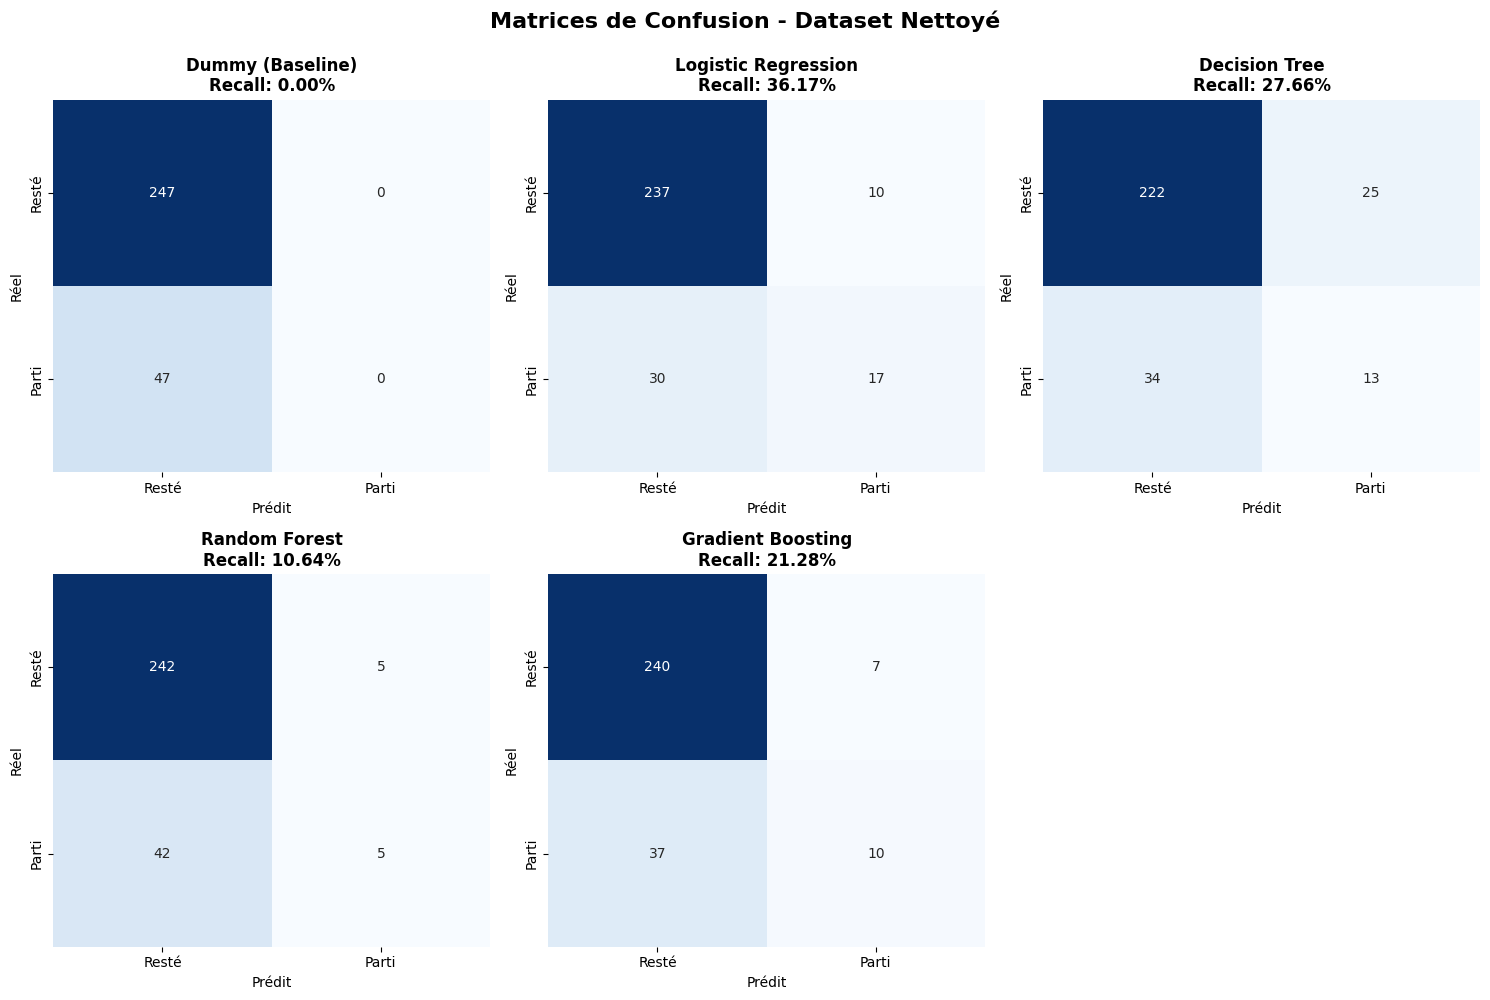

In [20]:
modeles = get_models_config(use_class_weight=False)

# Entraînement et évaluation
results_clean, preds_clean, cms_clean, models_clean = train_and_evaluate_models(
    X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test,
    modeles,
    verbose=True
)

# Visualisation
plot_results(results_clean, cms_clean, titre="Dataset Nettoyé")

### 10.3 Expérimentation 3 : Optimisation Dataset avec class_weight='balanced'


────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Logistic Regression
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.7857
     • Recall (test)   : 0.6809 ⭐ (métrique clé)
     • F1-Score (test) : 0.5039
     • 💰 Coût métier  : 198 (FP=48 + FN×10=15×10=150)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Decision Tree
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.7789
     • Recall (test)   : 0.3830 ⭐ (métrique clé)
     • F1-Score (test) : 0.3564
     • 💰 Coût métier  : 326 (FP=36 + FN×10=29×10=290)

────────────────────────────────────────────────────────────────────────────────
🔄 Entraînement : Random Forest
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8401
     • Rec

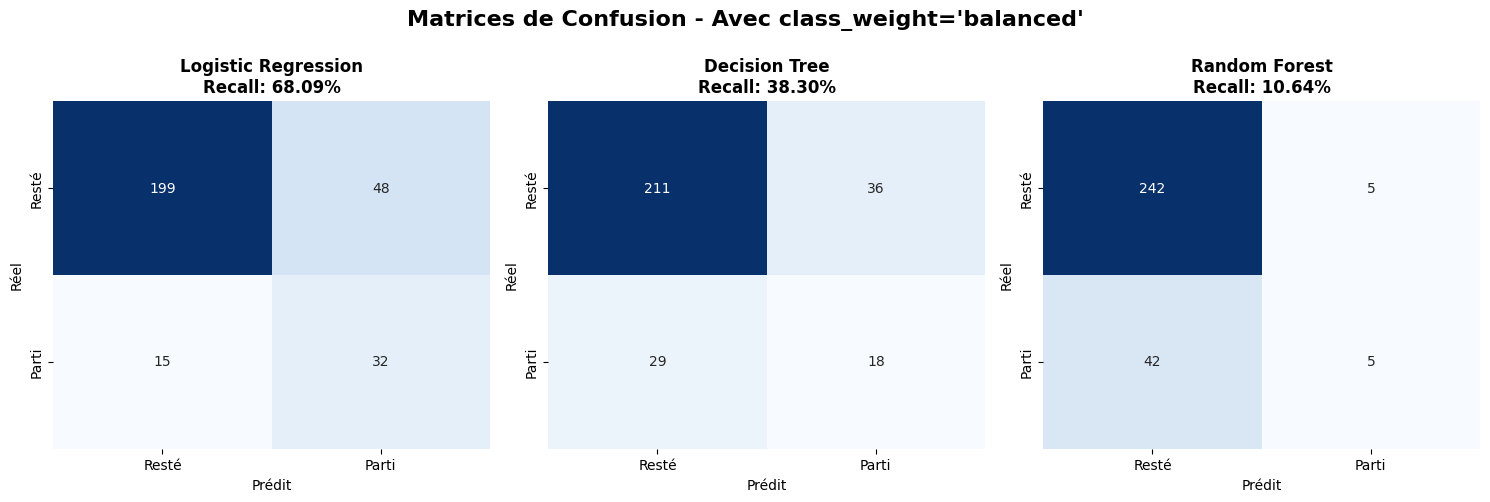

In [21]:
modeles_balanced = get_models_config(use_class_weight=True)

# On teste uniquement les modèles compatibles avec class_weight
modeles_a_tester = {
    'Logistic Regression': modeles_balanced['Logistic Regression'],
    'Decision Tree': modeles_balanced['Decision Tree'],
    'Random Forest': modeles_balanced['Random Forest']
}

# Entraînement et évaluation
results_balanced, preds_balanced, cms_balanced, models_balanced = train_and_evaluate_models(
    X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test,
    modeles_a_tester,
    verbose=True
)

# Visualisation
plot_results(results_balanced, cms_balanced, titre="Avec class_weight='balanced'")

## 11. Interprétabilité du Meilleur Modèle (SHAP)

Analyse de l'importance des features avec SHAP values.

### 11.1 . Sélection du meilleur modèle

In [22]:
# Récupérer le meilleur modèle (Logistic Regression avec class_weight='balanced')
best_model_name = 'Logistic Regression'
best_model = models_balanced[best_model_name]

print(f"✅ Modèle sélectionné pour l'interprétabilité : {best_model_name}")
print(f"   Configuration : class_weight='balanced'")
print(f"   Dataset : X_cleaned (sans features corrélées)")

✅ Modèle sélectionné pour l'interprétabilité : Logistic Regression
   Configuration : class_weight='balanced'
   Dataset : X_cleaned (sans features corrélées)


### 11.2 Feature Importance via Coefficients

📊 FEATURE IMPORTANCE - COEFFICIENTS DU MODÈLE

🏆 TOP 15 FEATURES LES PLUS IMPORTANTES (valeur absolue) :

                             Feature  Coefficient  Abs_Coefficient
       heure_supplementaires_encoded     0.745964         0.745964
             annee_experience_totale    -0.553169         0.553169
                    poste_Consultant     0.491580         0.491580
           poste_Directeur Technique    -0.475596         0.475596
 annees_depuis_la_derniere_promotion     0.473235         0.473235
       frequence_deplacement_encoded     0.453908         0.453908
      nombre_experiences_precedentes     0.452420         0.452420
 satisfaction_employee_environnement    -0.419274         0.419274
           statut_marital_Divorcé(e)    -0.413647         0.413647
                      revenu_mensuel     0.398135         0.398135
       poste_Représentant Commercial     0.390842         0.390842
         annees_dans_le_poste_actuel    -0.380075         0.380075
satisfaction_employee_n

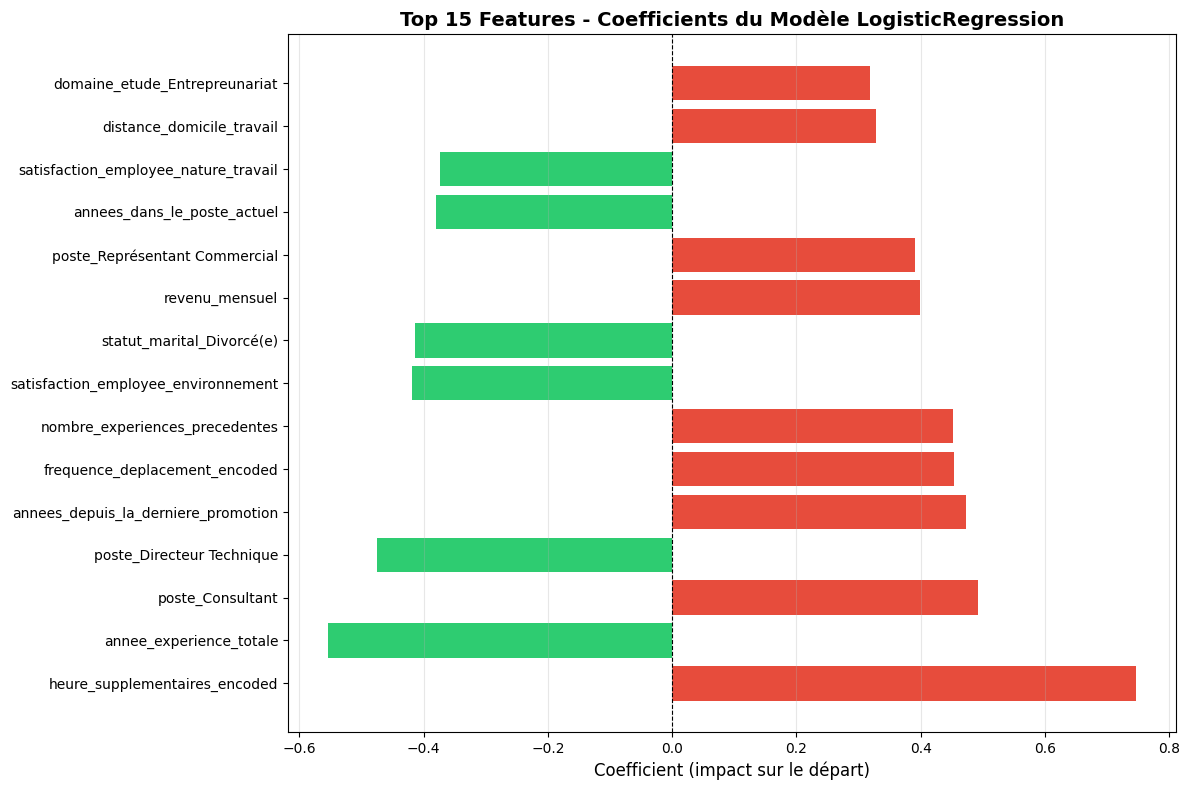


💡 INTERPRÉTATION :
  • Coefficient POSITIF (rouge) → Augmente le risque de départ
  • Coefficient NÉGATIF (vert) → Diminue le risque de départ


In [23]:
print("="*80)
print("📊 FEATURE IMPORTANCE - COEFFICIENTS DU MODÈLE")
print("="*80)

# Récupérer le modèle logistique 
log_model = best_model.named_steps['classifier']
feature_names = X_cleaned_test.columns

# Récupérer les coefficients
coefficients = log_model.coef_[0]

# Créer DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

# Afficher top 15
print("\n🏆 TOP 15 FEATURES LES PLUS IMPORTANTES (valeur absolue) :\n")
print(coef_df.head(15).to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = coef_df.head(15)
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_15['Coefficient']]
ax.barh(range(len(top_15)), top_15['Coefficient'], color=colors)
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Feature'])
ax.set_xlabel('Coefficient (impact sur le départ)', fontsize=12)
ax.set_title('Top 15 Features - Coefficients du Modèle LogisticRegression', 
             fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 INTERPRÉTATION :")
print("  • Coefficient POSITIF (rouge) → Augmente le risque de départ")
print("  • Coefficient NÉGATIF (vert) → Diminue le risque de départ")

### 11.3 SHAP Values - Vue Globale

In [24]:
print("="*80)
print("📊 SHAP VALUES - ANALYSE GLOBALE")
print("="*80)

# Préparer les données (après standardisation)
scaler = best_model.named_steps['scaler']
X_cleaned_test_scaled = scaler.transform(X_cleaned_test)

# Créer l'explainer SHAP
explainer = shap.LinearExplainer(log_model, X_cleaned_test_scaled)
shap_values = explainer.shap_values(X_cleaned_test_scaled)

# 1. BEESWARM PLOT
print("\n1️⃣ BEESWARM PLOT - Impact des features sur chaque prédiction")
plt.figure(figsize=(12, 10))
shap.summary_plot(
    shap_values, X_cleaned_test,
    max_display=15,
    show=False
)
plt.title('SHAP Beeswarm Plot - Top 15 Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "─"*80 + "\n")

# 2. BAR PLOT
print("2️⃣ BAR PLOT - Importance moyenne (valeur absolue)")
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values, X_cleaned_test,
    plot_type="bar",
    max_display=15,
    show=False
)
plt.title('SHAP Bar Plot - Top 15 Features (Impact moyen)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 COMMENT LIRE LE BEESWARM PLOT :")
print("  • Axe X : Valeur SHAP (impact sur la prédiction)")
print("    - Positif (droite) = Augmente le risque de départ")
print("    - Négatif (gauche) = Diminue le risque de départ")
print("  • Couleur : Valeur de la feature")
print("    - Rouge = Valeur élevée")
print("    - Bleu = Valeur faible")
print("  • Chaque point = Une observation")

📊 SHAP VALUES - ANALYSE GLOBALE


NameError: name 'shap' is not defined

## 12. Feature Importance Locale 

#### 12.1 SHAP Waterfall - Exemples Individuels

In [ ]:
# (y_test = 1)
indices_partis = np.where(y_test == 1)[0]
print(f"\n📊 Nombre d'employés partis dans le test : {len(indices_partis)}")

# 2. Exemples de RÉTENTIONS (y_test = 0)
indices_restes = np.where(y_test == 0)[0]
print(f"📊 Nombre d'employés restés dans le test : {len(indices_restes)}")

# Sélectionner 3 exemples de chaque catégorie
exemples_partis = [0, 5, 10]  # Indices dans indices_partis
exemples_restes = [0, 5, 10]  # Indices dans indices_restes

print("\n" + "─"*80)
print("🔴 ANALYSE : 3 EMPLOYÉS QUI SONT PARTIS")
print("─"*80)

for i, exemple_idx in enumerate(exemples_partis, 1):
    if exemple_idx < len(indices_partis):
        idx = indices_partis[exemple_idx]
        
        print(f"\n{'='*60}")
        print(f"EXEMPLE {i} - Employé parti (index {idx})")
        print(f"{'='*60}")
        
        # Créer le Waterfall plot
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values[idx],
                base_values=explainer.expected_value,
                data=X_test.iloc[idx],
                feature_names=X_test.columns.tolist()
            ),
            max_display=10,
            show=False
        )
        plt.title(f'Waterfall Plot - Employé Parti #{i}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n" + "─"*80)
print("🟢 ANALYSE : 3 EMPLOYÉS QUI SONT RESTÉS")
print("─"*80)

for i, exemple_idx in enumerate(exemples_restes, 1):
    if exemple_idx < len(indices_restes):
        idx = indices_restes[exemple_idx]
        
        print(f"\n{'='*60}")
        print(f"EXEMPLE {i} - Employé resté (index {idx})")
        print(f"{'='*60}")
        
        # Créer le Waterfall plot
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values[idx],
                base_values=explainer.expected_value,
                data=X_test.iloc[idx],
                feature_names=X_test.columns.tolist()
            ),
            max_display=10,
            show=False
        )
        plt.title(f'Waterfall Plot - Employé Resté #{i}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n💡 COMMENT LIRE LE WATERFALL PLOT :")
print("  • Base value (f(x)) : Prédiction moyenne du modèle")
print("  • Flèches rouges (→) : Poussent vers le DÉPART")
print("  • Flèches bleues (←) : Poussent vers la RÉTENTION")
print("  • f(x) final : Prédiction pour cet employé spécifique")

print("\n" + "="*80)
print("✅ ÉTAPE 9.4 TERMINÉE")
print("="*80)

## 12 Convertion du fichier

On va convertir notre fichier en .joblib interpretable pour constituer une API

In [26]:
import joblib, os

os.makedirs("../models", exist_ok=True)

joblib.dump(best_model, "../models/model.joblib")
joblib.dump(X_cleaned_train.columns.tolist(), "../models/feature_names.joblib")

print("✅ Modèle sauvegardé !")

✅ Modèle sauvegardé !


In [27]:
print(X_cleaned_train.columns.tolist())

['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'augmentation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'frequence_deplacement_encoded', 'heure_supplementaires_encoded', 'genre_encoded', 'statut_marital_Divorcé(e)', 'statut_marital_Marié(e)', 'departement_Consulting', 'poste_Cadre Commercial', 'poste_Consultant', 'poste_Directeur Technique', 'poste_Manager', 'poste_Représentant Commercial', 'poste_Ressources Humaines', 'poste_Senior Manager', 'poste_Tech Lead', 'domaine_etude_Entrepreunariat', 'domaine_etude_Infra & Cloud', 'domaine_etude_Marketing', 'domaine_et